<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/Task2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [13]:
X.shape

(150, 4)

In [50]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Principal components
print("Principal Components (sklearn):\n", pca.components_[:2])

Principal Components (sklearn):
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [53]:
# Step 1: Mean center the data
X_meaned = X - np.mean(X, axis=0)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Select the first 2 principal components (eigenvectors)
principal_components = eigenvectors_sorted[:, :2]

# Step 6: Project the data onto the first 2 principal components
X_pca_manual = X_meaned.dot(principal_components)

# Print the principal components
print("Principal Components (manual calculation):")
print(principal_components[:4])

Principal Components (manual calculation):
[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


In [74]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("Number of Components to preserve 95% variance:", pca.n_components_)
print("Explained Variance Ratio (each component):", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Number of Components to preserve 95% variance: 2
Explained Variance Ratio (each component): [0.92461872 0.05306648]
Total Variance Explained: 0.9776852063187977


In [73]:
pca_90 = PCA(n_components=0.90)
X_pca_90 = pca_90.fit_transform(X)

print("Number of Components to preserve 95% variance:", pca_90.n_components_)
print("Explained Variance Ratio (each component):", pca_90.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca_90.explained_variance_ratio_))

Number of Components to preserve 95% variance: 1
Explained Variance Ratio (each component): [0.92461872]
Total Variance Explained: 0.924618723201734


In [75]:
X_pca.shape


(150, 2)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

X = data.data  # Original dataset (4 features)
y = data.target

y_encoded = to_categorical(y)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model_original = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in the Iris dataset
])

# Compile the model
model_original.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_original.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss_original, accuracy_original = model_original.evaluate(X_test, y_test)
print(f"\nOriginal Dataset - Test Accuracy: {accuracy_original * 100:.2f}%")



Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3861 - loss: 1.1634 - val_accuracy: 0.5000 - val_loss: 1.0057
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7422 - loss: 0.9348 - val_accuracy: 0.7083 - val_loss: 0.8634
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 0.7897 - val_accuracy: 0.7500 - val_loss: 0.7875
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - loss: 0.7162 - val_accuracy: 0.7917 - val_loss: 0.6976
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9258 - loss: 0.6407 - val_accuracy: 1.0000 - val_loss: 0.5861
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8222 - loss: 0.5457 - val_accuracy: 0.7917 - val_loss: 0.5958
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9038 - loss: 0.4989 - val_accuracy: 1.0000 - val_loss: 0.4965
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9767 - loss: 0.4471 - val_accuracy: 0.9583 - val_loss

In [78]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Apply PCA transformation to the data

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define a neural network model for the PCA-transformed data
model_pca = Sequential([
    Dense(64, input_dim=X_train_pca.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in the Iris dataset
])

model_pca.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_pca.fit(X_train_pca, y_train_pca, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss_pca, accuracy_pca = model_pca.evaluate(X_test_pca, y_test_pca)
print(f"\nPrincipal Components Dataset - Test Accuracy: {accuracy_pca * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4357 - loss: 1.0235 - val_accuracy: 0.7083 - val_loss: 0.8315
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6745 - loss: 0.7814 - val_accuracy: 0.7500 - val_loss: 0.7170
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7118 - loss: 0.6536 - val_accuracy: 0.7500 - val_loss: 0.6417
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7670 - loss: 0.5436 - val_accuracy: 0.7500 - val_loss: 0.5771
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8051 - loss: 0.5140 - val_accuracy: 0.7500 - val_loss: 0.5224
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.4414 - val_accuracy: 0.7500 - val_loss: 0.4824
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4415 - val_accuracy: 0.8333 - val_loss: 0.4558
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7912 - loss: 0.4365 - val_accuracy: 0.8333 - val_loss: 0.4368
Ep

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6298 - loss: 0.9407 - val_accuracy: 0.7083 - val_loss: 0.8085
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6212 - loss: 0.7706 - val_accuracy: 0.7083 - val_loss: 0.6720
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6556 - loss: 0.6406 - val_accuracy: 0.7500 - val_loss: 0.5658
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7541 - loss: 0.5545 - val_accuracy: 0.8333 - val_loss: 0.5055
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - loss: 0.4550 - val_accuracy: 0.8333 - val_loss: 0.4559
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3701 - val_accuracy: 0.8750 - val_loss: 0.4284
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3589 - val_accuracy: 0.8750 - val_loss: 0.4136
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8294 - loss: 0.3891 - val_accuracy: 0.8750 - val_loss: 0.4044
Ep

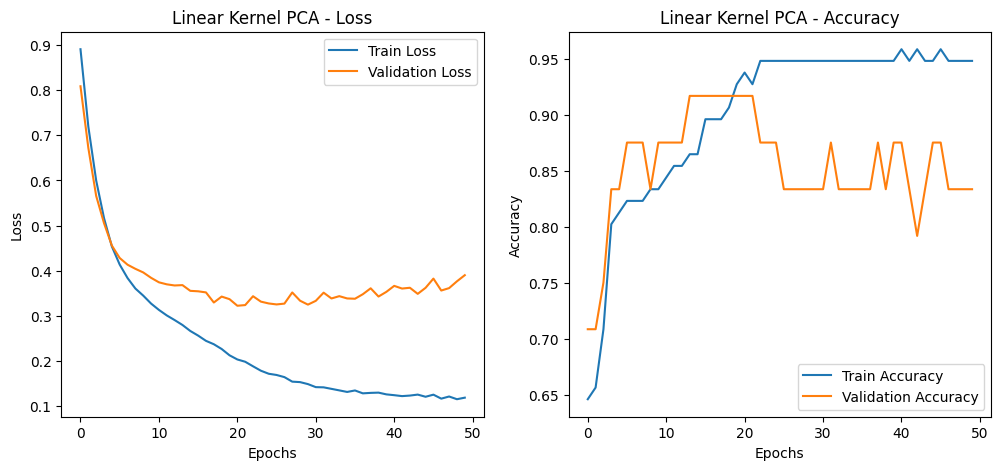

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2027 - loss: 1.0970 - val_accuracy: 0.7083 - val_loss: 1.0593
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5439 - loss: 1.0256 - val_accuracy: 0.6667 - val_loss: 1.0192
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6171 - loss: 0.9598 - val_accuracy: 0.7083 - val_loss: 0.9750
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6754 - loss: 0.8815 - val_accuracy: 0.7917 - val_loss: 0.9306
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.8193 - val_accuracy: 0.7500 - val_loss: 0.8826
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8286 - loss: 0.7359 - val_accuracy: 0.7500 - val_loss: 0.8357
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7620 - loss: 0.6945 - val_accuracy: 0.7500 - val_loss: 0.7861
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8044 - loss: 0.6479 - val_accuracy: 0.7917 - val_loss

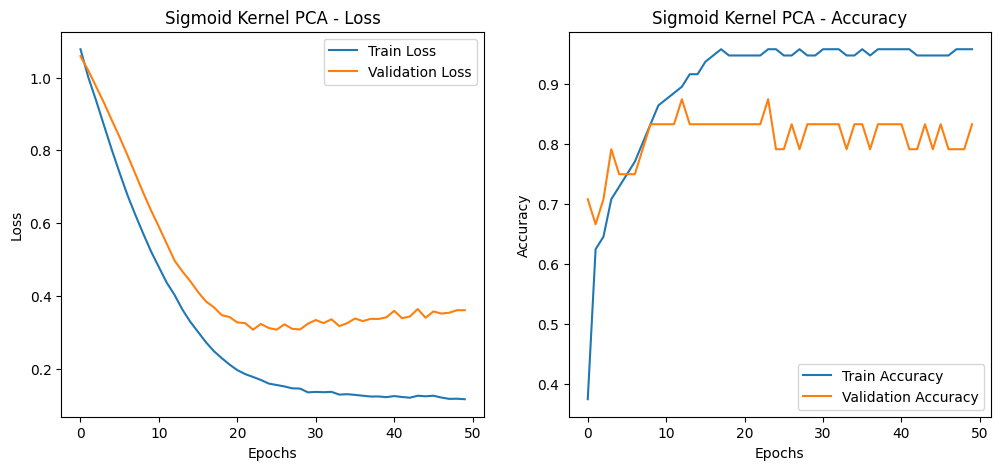

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3132 - loss: 1.1008 - val_accuracy: 0.7500 - val_loss: 1.0405
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8480 - loss: 1.0085 - val_accuracy: 0.8333 - val_loss: 0.9714
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8185 - loss: 0.9221 - val_accuracy: 0.8750 - val_loss: 0.8985
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.8410 - val_accuracy: 0.8750 - val_loss: 0.8181
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8077 - loss: 0.7637 - val_accuracy: 0.8333 - val_loss: 0.7348
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.6760 - val_accuracy: 0.8750 - val_loss: 0.6577
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7978 - loss: 0.6199 - val_accuracy: 0.8750 - val_loss: 0.5917
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8358 - loss: 0.4433 - val_accuracy: 0.8750 - val_loss

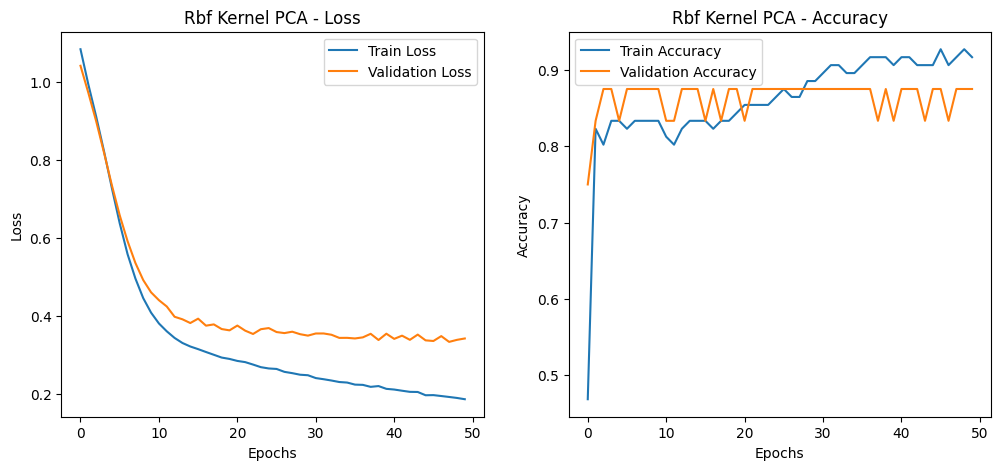

In [83]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes in the Iris dataset
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
kernels = ['linear', 'sigmoid', 'rbf']
X_train_kpca_list = []
X_test_kpca_list = []

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1 if kernel == 'rbf' else None)
    X_train_kpca = kpca.fit_transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)
    X_train_kpca_list.append(X_train_kpca)
    X_test_kpca_list.append(X_test_kpca)

# Train and evaluate models for each KernelPCA output
for i, kernel in enumerate(kernels):
    # Build the neural network model
    model = build_model(X_train_kpca_list[i].shape[1])

    # Train the model on Kernel PCA transformed data
    history = model.fit(
        X_train_kpca_list[i], y_train,
        epochs=50, batch_size=8, validation_split=0.2, verbose=1
    )

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test_kpca_list[i], y_test)
    print(f"\n{kernel.capitalize()} Kernel PCA - Test Accuracy: {accuracy * 100:.2f}%, Test Loss: {loss:.4f}")

    # Plot training loss and accuracy for each kernel
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{kernel.capitalize()} Kernel PCA - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{kernel.capitalize()} Kernel PCA - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('kpca', KernelPCA()),         # Kernel PCA for dimensionality reduction
    ('clf', MLPClassifier(max_iter=300, random_state=42))  # Neural network classifier
])

# Define hyperparameters to tune
param_grid = {
    'kpca__n_components': [2, 3],  # Number of principal components
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel types
    'kpca__gamma': [0.1, 0.5, 1],  # Gamma parameter (for RBF and sigmoid)
    'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Neural network structure
    'clf__activation': ['relu', 'tanh'],  # Activation functions
    'clf__learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test accuracy with best parameters:", test_score)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'clf__activation': 'relu', 'clf__hidden_layer_sizes': (50,), 'clf__learning_rate_init': 0.01, 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 3}
Best cross-validation accuracy: 0.9583333333333334
Test accuracy with best parameters: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
